In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])
print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
73,6.1,2.8,4.7,1.2,1,versicolor
111,6.4,2.7,5.3,1.9,2,virginica
119,6.0,2.2,5.0,1.5,2,virginica
9,4.9,3.1,1.5,0.1,0,setosa
115,6.4,3.2,5.3,2.3,2,virginica


In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

In [4]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

In [5]:
model = tree.DecisionTreeClassifier(random_state= 1)
model.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [6]:
model.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 T

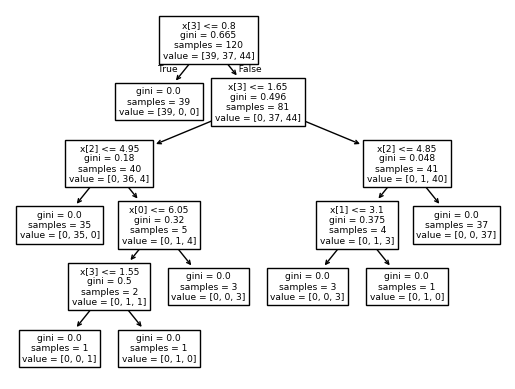

In [7]:
tree.plot_tree(model)

In [8]:
# ВЫбираем параметры для поиска
feature = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [3, 4, 5, 7, 10, 15], 
    'min_samples_leaf': [5, 3, 7, 10] 
}

In [9]:
# Строим модель
model = tree.DecisionTreeClassifier(random_state=13)

In [10]:
# Осуществляем поиск
search = GridSearchCV(estimator=model, param_grid=feature, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [5, 3, 7, 10]},
             scoring='accuracy')

In [11]:
# Пишем лучшие параметры и точность
print("Лучшие параметры:", search.best_params_)
print("Лучшая точность на кросс-валидации:", round(search.best_score_, 2))

Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Лучшая точность на кросс-валидации: 0.93


In [12]:
# Проверяем точность
model1 = search.best_estimator_
test_accuracy = model1.score(X_test, y_test)
print("Точность на тестовых данных с лучшими параметрами:", round(test_accuracy, 2))

Точность на тестовых данных с лучшими параметрами: 0.97
